In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
def eda(df:pd.DataFrame)->None:
  print("-"*15,"DataFrame shape", "-"*15 )
  print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")
  print("-"*15,"DataFrame info", "-"*15 )
  print(df.info())
  print("-"*15,"DataFrame isna", "-"*15 )
  print(df.isna().sum())
  print("-"*15,"DataFrame is duplicated", "-"*15 )
  print(df.duplicated().sum())
  print("-"*15,"DataFrame describe numeric", "-"*15 )
  print(df.describe(percentiles=[.01,0.1,.25,.5,.75,.90,.99]))
  print("-"*15,"DataFrame desribe categorical", "-"*15 )
  print(df.describe(exclude=[np.number]))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ADA-DS/Machine Learning I/projeto/dadostransito.csv')
df.head()

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos,veiculos,year,month,hour,...,cruzamento,curva,desvio temporário,interseção de vias,ponte,reta,retorno regulamentado,rotatória,túnel,viaduto
0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,2007.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,1.0,1.0,1.0,2.0,2007.0,1.0,15.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,2.0,0.0,1.0,2007.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,2.0,0.0,2.0,2007.0,1.0,16.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.0,0.0,1.0,0.0,1.0,1.0,2.0,2007.0,1.0,21.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'feridos', 'veiculos', 'year', 'month', 'hour', 'final de semana',
       'semana', 'fator humano', 'fator veículo', 'fator via', 'atropelamento',
       'capotamento', 'colisão', 'derramamento de carga', 'incêndio', 'queda',
       'saída de pista', 'tombamento', 'com vítimas fatais',
       'com vítimas feridas', 'sem vítimas', 'amanhecer', 'anoitecer',
       'plena noite', 'pleno dia', 'rural', 'urbano', 'crescente',
       'decrescente', 'tempo bom', 'tempo ruim', 'dupla', 'múltipla',
       'simples', 'cruzamento', 'curva', 'desvio temporário',
       'interseção de vias', 'ponte', 'reta', 'retorno regulamentado',
       'rotatória', 'túnel', 'viaduto'],
      dtype='object')

###Tratando a coluna mortes em classe sim e não - para realizar a classificação

In [ ]:
df_classificacao = df.copy()

In [ ]:
def conversaoBinaria1(lista):
    lista_mortes = []
    for valor in lista:
        if valor >= 1:
            lista_mortes.append(1)
        else:
            lista_mortes.append(0)

    return lista_mortes

In [ ]:
classificacaoBinariaMortos = conversaoBinaria1(df_classificacao['mortos'])
classificacaoBinariaMortos

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
df_classificacao['Mortos'] = classificacaoBinariaMortos

In [ ]:
df_classificacao['Mortos'].value_counts()

Mortos
0    1263484
1      51519
Name: count, dtype: int64

In [ ]:
df_classificacao

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos,veiculos,year,month,hour,...,curva,desvio temporário,interseção de vias,ponte,reta,retorno regulamentado,rotatória,túnel,viaduto,Mortos
0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,2007.0,1.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,2.0,0.0,0.0,1.0,1.0,1.0,2.0,2007.0,1.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2.0,0.0,0.0,0.0,2.0,0.0,1.0,2007.0,1.0,14.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,2.0,0.0,0.0,0.0,2.0,0.0,2.0,2007.0,1.0,16.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,2.0,0.0,1.0,0.0,1.0,1.0,2.0,2007.0,1.0,21.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314998,2.0,0.0,0.0,0.0,2.0,0.0,2.0,2021.0,8.0,23.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1314999,2.0,0.0,1.0,1.0,0.0,2.0,1.0,2021.0,8.0,22.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1315000,2.0,0.0,0.0,1.0,1.0,1.0,2.0,2021.0,8.0,22.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1315001,2.0,0.0,1.0,0.0,1.0,1.0,1.0,2021.0,8.0,21.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


###1 º Teste - Modelo de Classificação - Regressão Logística

In [ ]:
#features
X = df_classificacao.drop(columns=['mortos','Mortos'])
#label
y = df_classificacao['Mortos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.9665171951401897

In [ ]:

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[376376,   2795],
       [ 10414,   4916]])

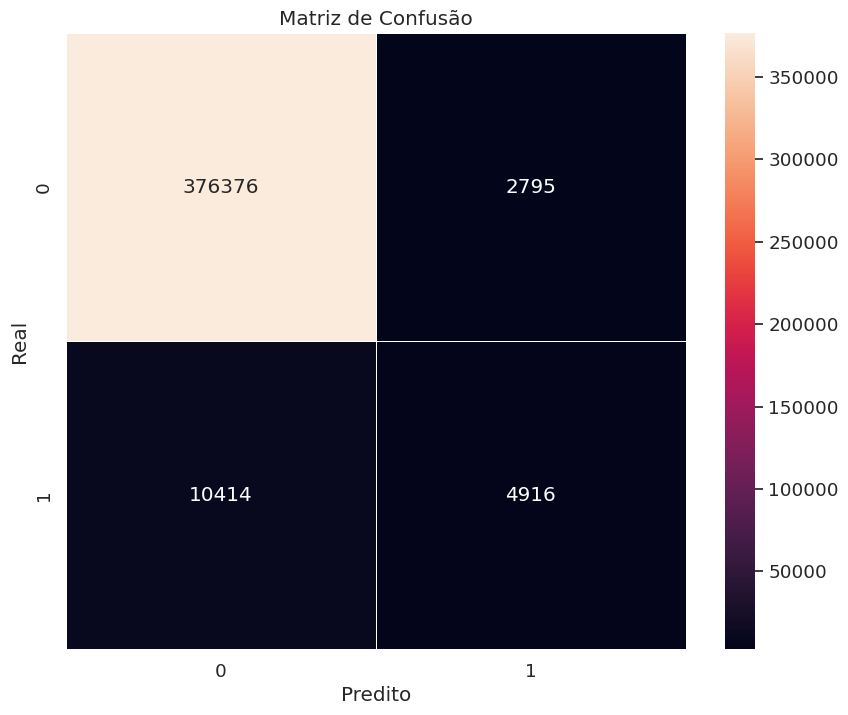

In [ ]:
sns.set(font_scale=1.2)  # Ajustar o tamanho da fonte
plt.figure(figsize=(10, 8))  # Ajustar o tamanho da figura
sns.heatmap(matrix, annot=True, fmt='d', linewidths=.5)  # Criar o mapa de calor
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


*   Acidentes com mortos (1)

*   Acidentes sem mortos (0)
*    376376 observações foram classificadas corretamente como "Sem Mortes" (0) - Verdadeiros Positivos (VP).
*    2795 observações foram classificadas incorretamente como "Com Mortes" (1) - Falsos Positivos (FP).
*     10414 observações foram classificadas incorretamente como "Sem Mortes" (0) - Falsos Negativos (FN).
*     4916 observações foram classificadas corretamente como "Com Mortes" (1) - Verdadeiros Negativos (VN).

- Falso negativo está muito alto, ou seja o erro de falar que não morreu e na verdade morreu deveria ser mais baixo, o modelo deveria errar mais na previsao de falar que morreu e não morreu, pois assim previniamos muito mais acidentes. - Os dados estão desbalanceados, e nesse caso deveria usar a ideia de pegar somente os casos com acidentes graves e checar novamente.

Árvore de Decisão - Classificação

In [ ]:


model1 = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0  # cost complexity prunning
)

In [ ]:
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
acc1 = accuracy_score(y_test, y_pred1)
acc1

0.9616578918684616

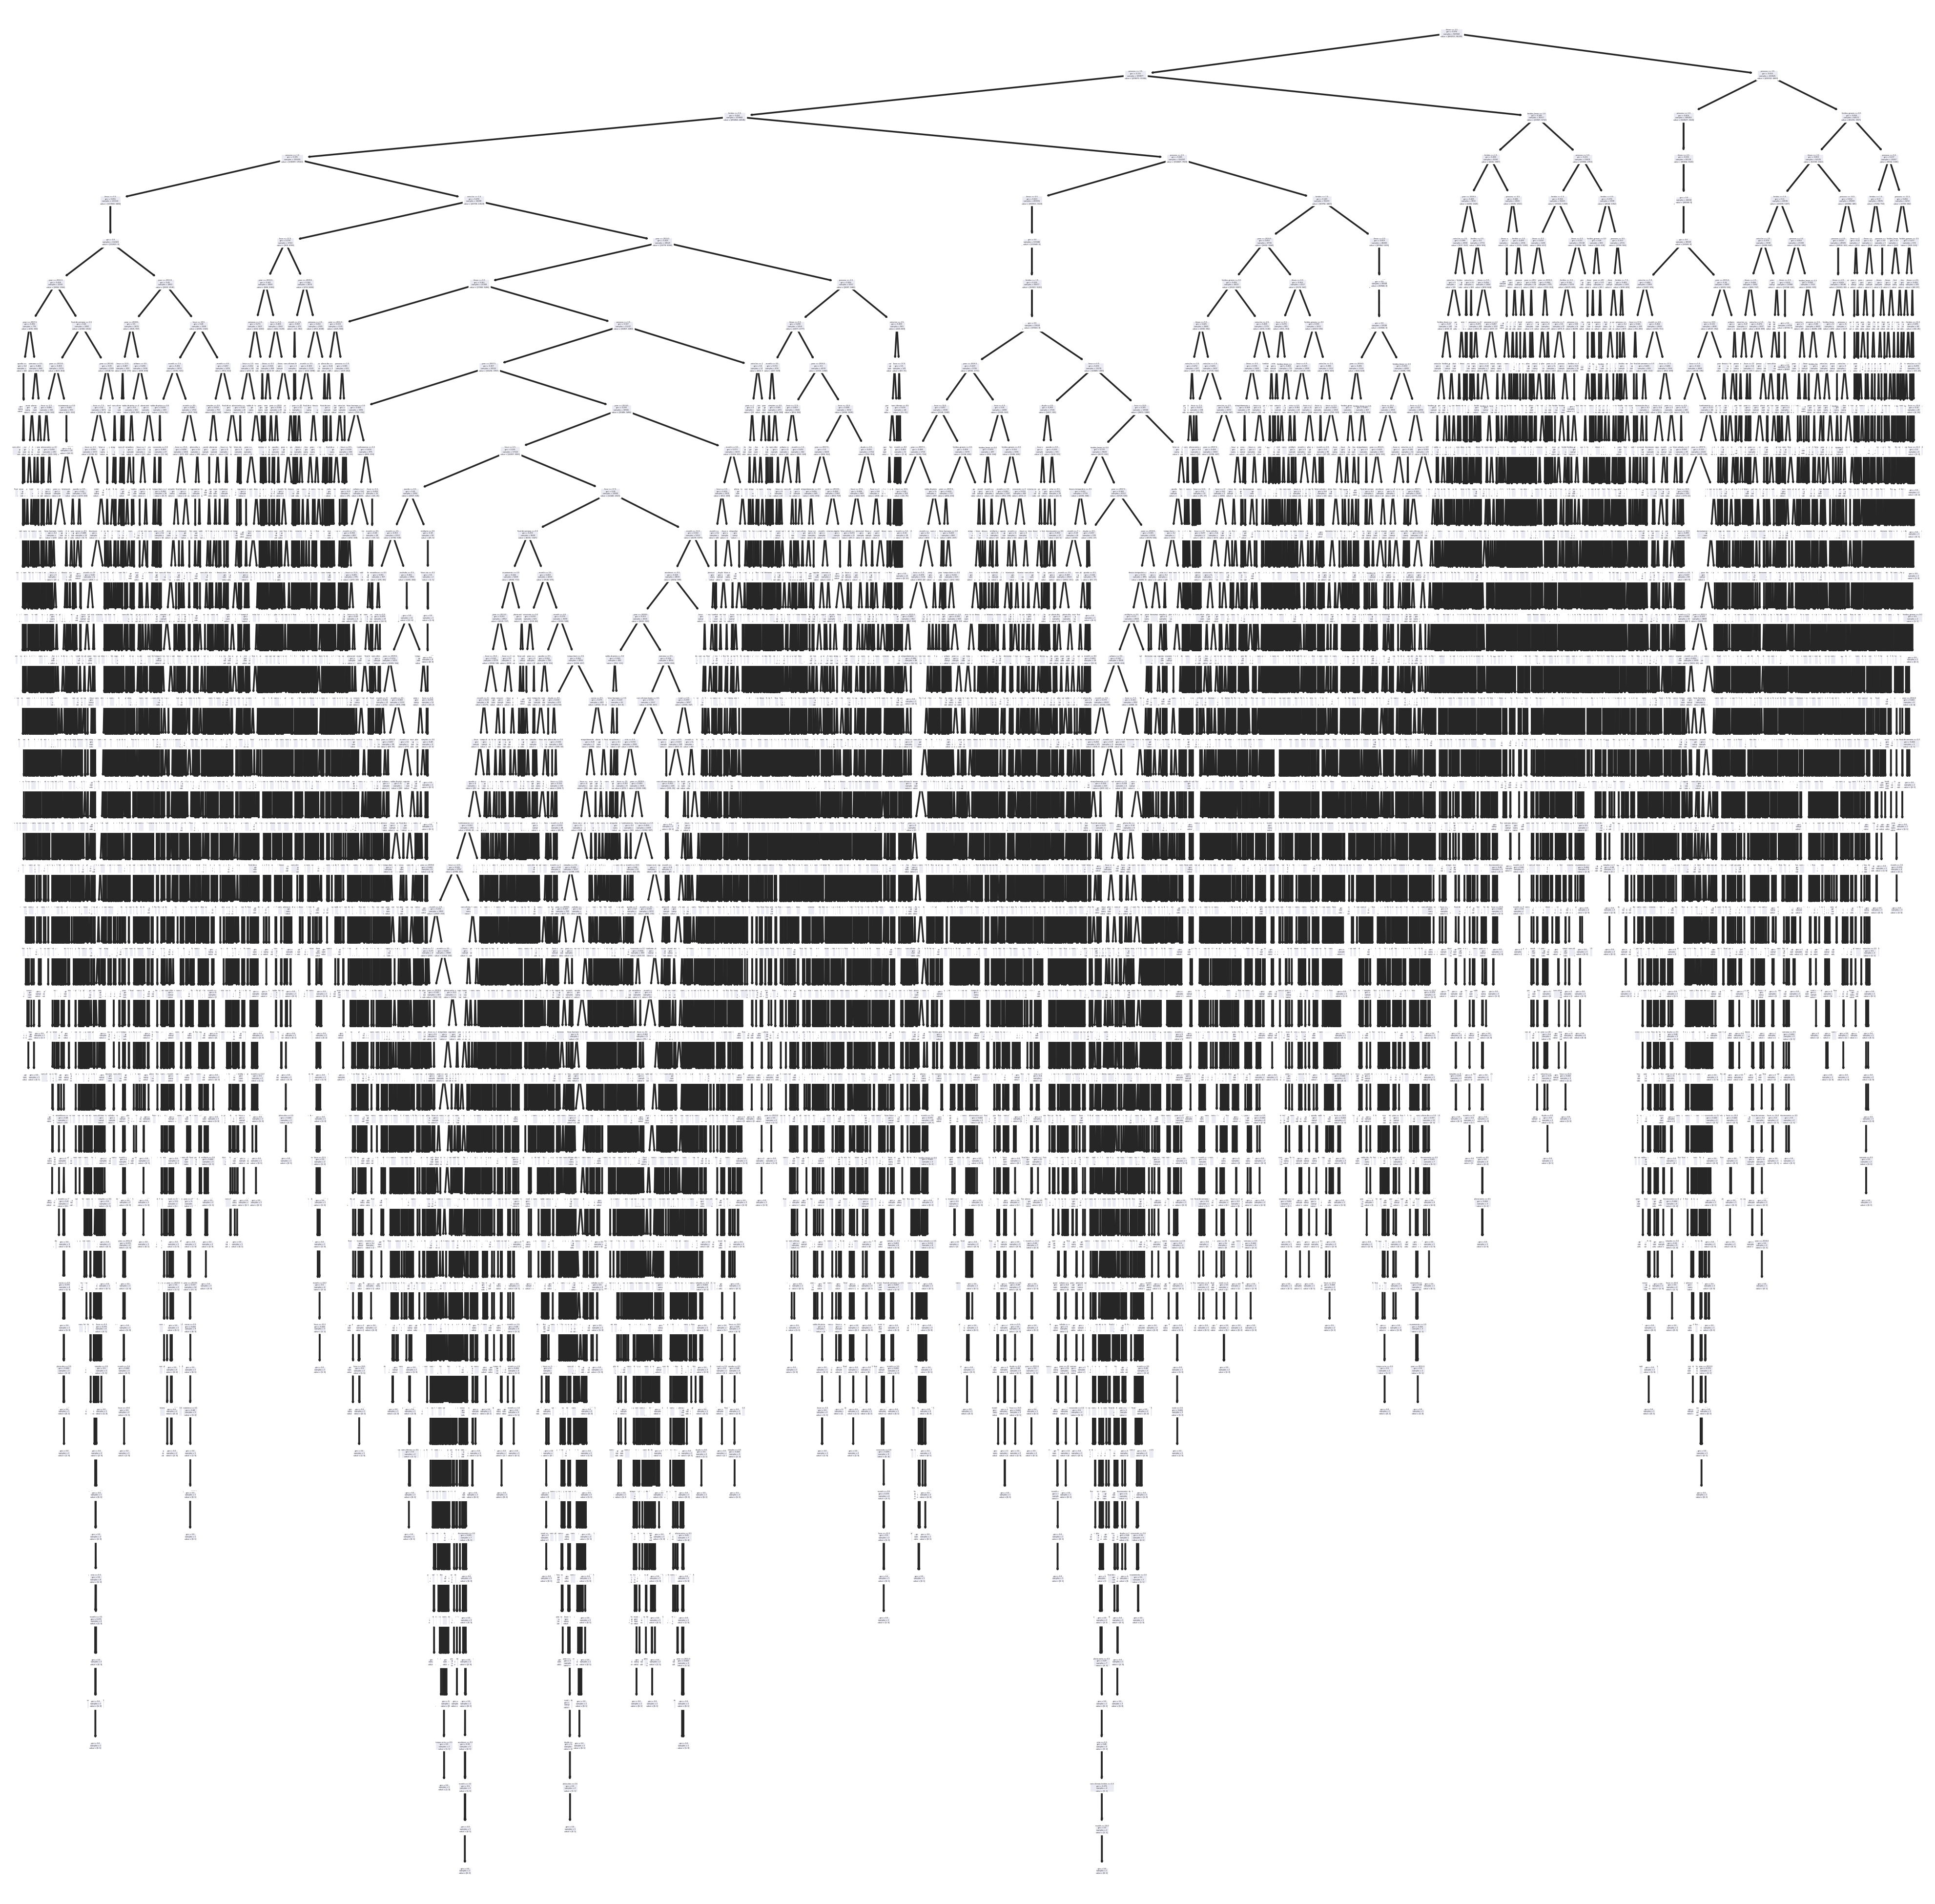

In [ ]:


plt.figure(figsize=(20,20), dpi=250)
tree.plot_tree(model1, feature_names=X_train.columns.to_list())
plt.show()

In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
import dtreeviz

viz = dtreeviz.model(model1,
                     X_train=X_train,
                     y_train=y_train,
                     feature_names=X_train.columns.to_list(),
                     target_name='Mortos',
                     class_names=['0','1']

                    )

viz.view()

Streaming output truncated to the last 5000 lines.


In [ ]:


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    379171
           1       0.64      0.32      0.43     15330

    accuracy                           0.97    394501
   macro avg       0.81      0.66      0.70    394501
weighted avg       0.96      0.97      0.96    394501



###RECALL - revocação Erro tipo II está muito alto.

###KNN - 'K-vizinhos mais proximos'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model2 =KNeighborsClassifier(n_neighbors=1)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred3 = model2.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
print(confusion_matrix(y_test,y_pred3))

[[372127   7044]
 [ 12486   2844]]


In [21]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    379171
           1       0.29      0.19      0.23     15330

    accuracy                           0.95    394501
   macro avg       0.63      0.58      0.60    394501
weighted avg       0.94      0.95      0.95    394501



In [22]:
acc2 = accuracy_score(y_test, y_pred3)
acc2

0.9504944220673712

In [ ]:
error = []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

In [ ]:
plt.plot(range(1,10),error,color='red',linestyle='dashed',maker='o',markerfacecolor='blue',markersize=10)
plt.title('ERROR RATE K VALUE')
plt.xlabel('K value')
plt.ylabel('Mean Error')